In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('dataframe_con_totales.csv')

In [3]:
df.head()

,nombre_empresa,sector_empresa,visual_1,visual_2,visual_3,auditivo_1,auditivo_2,auditivo_3,fisico_1,fisico_2,...,sexo_usuario,nivel_informatica,telefono_usuario,edad_arg,visual_tot,auditivo_tot,fisico_tot,cognitivo_tot,tecnico_tot,val_tot
0,Santander,Banca,1.0,1.0,3.0,3.0,2.0,3.0,3.0,2.0,...,Varon,Basico,+34 649092558,61-70,1.666667,2.666667,2.666667,2.333333,1.666667,2.200000
1,BBVA,Banca,2.0,1.0,2.0,2.0,3.0,3.0,1.0,1.0,...,Varon,Medio,+34746111406,71-80,1.666667,2.666667,1.000000,2.000000,2.333333,1.933333
2,Santander,Banca,3.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,...,Mujer,Alto,+34 718 086 618,50-60,2.666667,2.666667,2.666667,2.000000,1.666667,2.333333
3,ING,Banca,3.0,1.0,1.0,2.0,3.0,1.0,2.0,3.0,...,Mujer,Medio,+34606 388 750,81-90,1.666667,2.000000,2.666667,1.666667,2.000000,2.000000
4,BBVA,Banca,3.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,...,Mujer,Basico,+34731 936 576,50-60,2.000000,2.000000,1.333333,2.333333,2.333333,2.000000


## Rango de edads
Ya se que Pedro agrego en el dataFrame el rango pero en el mío agregue la palabras años, creo se ve mejor visualmente en 
las gráficas, en caso que no te guste solo usa el de Pedro y Listo.

In [4]:
# Funtion para el rango de edades con la palabra año añadida.
def group_age(edad_usuario):
    if edad_usuario <= 60:
        return '50 - 60 años'
    elif edad_usuario <= 70:
        return '61 - 70 años'
    elif edad_usuario <= 80:
        return '71 - 80 años'
    elif edad_usuario <= 90:
        return '81 - 90 años'

In [5]:
df['años_rango'] = df['edad_usuario'].apply(group_age)

In [6]:
df['años_rango']

0        61 - 70 años
1        71 - 80 años
2        50 - 60 años
3        81 - 90 años
4        50 - 60 años
             ...     
99995    81 - 90 años
99996    71 - 80 años
99997    81 - 90 años
99998    71 - 80 años
99999    61 - 70 años
Name: años_rango, Length: 100000, dtype: object

## Vamos con las Gráfica de barras 


##  Nivel de informatica por persona

findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


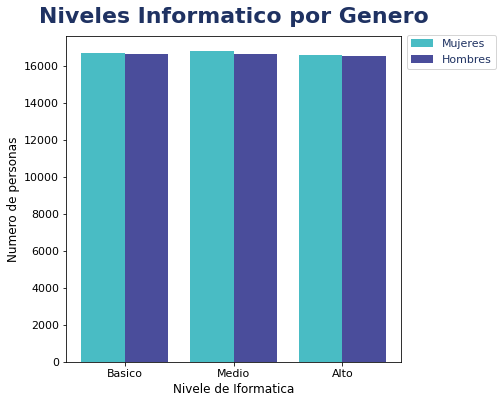

In [18]:
def nivel_info_by_sex(sexo,nivel):
    return nivel_sexo_inf[(nivel_sexo_inf['nivel_informatica'] == nivel) 
                                        & (nivel_sexo_inf['sexo_usuario'] == sexo)]['sexo_usuario'].count()

def nivel_info_by_age(grupo_edad,nivel):
    return df[(df['nivel_informatica'] == nivel) 
                                        & (df['edad_usuario'] <= grupo_edad)]['edad_arg'].count()

nivel_sexo_inf = df[['nivel_informatica','sexo_usuario']]

y_mujer = []
y_varon = []

niveles = []
for _ in df['nivel_informatica'].unique():
    y_mujer.append(nivel_info_by_sex('Mujer',_))
    y_varon.append(nivel_info_by_sex('Varon',_))


x_label = df['nivel_informatica'].unique()
x_label = np.array(x_label)
x_axis = np.arange(len(x_label))

font = {'family' : 'Lato',
        'weight' : 'bold',
        'size'   : 22}

fot_label = {'family' : 'Lato','size'   : 12 }
plt.figure(figsize = (6,6))
plt.bar(x_axis - 0.2, y_mujer, 0.4, label = 'Mujeres',color = '#49BCC4')
plt.bar(x_axis + 0.2, y_varon, 0.4, label = 'Hombres',color = '#4A4D9B')

plt.xticks(x_axis, x_label)
plt.xlabel("Nivele de Iformatica",font = fot_label)
plt.ylabel("Numero de personas",font = fot_label)
plt.title("Niveles Informatico por Genero",font = font,y = 1.02)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

### Nivel de informatica por Grupo de edades


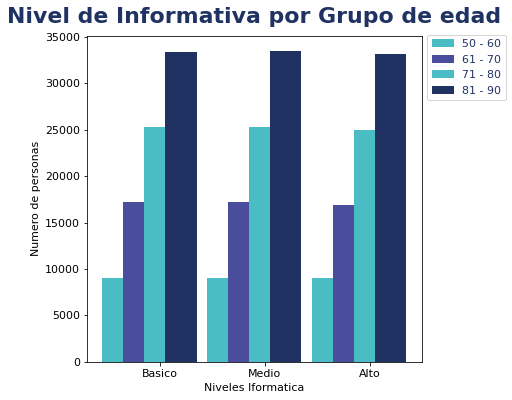

In [19]:
# arra donde guardaremos el count de cada grupo
y_grupo_edad_60  = []
y_grupo_edad_70  = []
y_grupo_edad_80  = []
y_grupo_edad_90  = []

for _ in df['nivel_informatica'].unique():
    #Aqui LLamamos a la funcion
    y_grupo_edad_60.append(nivel_info_by_age(60,_))
    y_grupo_edad_70.append(nivel_info_by_age(70,_))
    y_grupo_edad_80.append(nivel_info_by_age(80,_))
    y_grupo_edad_90.append(nivel_info_by_age(90,_))
    
plt.figure(figsize = (6,6))
plt.bar(x_axis - 0.4, y_grupo_edad_60, 0.3, label = '50 - 60',color = '#49BCC4')
plt.bar(x_axis - 0.2, y_grupo_edad_70, 0.3, label = '61 - 70',color = '#4A4D9B')
plt.bar(x_axis + 0.0, y_grupo_edad_80, 0.3, label = '71 - 80',color = '#49BCC4')
plt.bar(x_axis + 0.2, y_grupo_edad_90, 0.3, label = '81 - 90',color = '#1F3262')



plt.xticks(x_axis, x_label)
plt.xlabel("Niveles Iformatica")
plt.ylabel("Numero de personas")
plt.title("Nivel de Informativa por Grupo de edad",font = font,y = 1.02)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

# Function pie chart solitaria.
En esta sección del codigo voy añadir la función qu sirve para todas las gráficas pie chart en solitario.
con solitario me refiero a que solo saca una sola imagen.

In [7]:
def visual_pie_chart_by_ageGroup(value_pie,legend_labels):
    """
    Parametros: 
    1. value_pie = Sería la x los valores hacer el pie chart
    2. legend_labels = Los nombre en la legend que van aparecr
    """
    fig, ax =  plt.subplots(figsize = (6,6))

    #tipografía, color de text y font family
    plt.rcParams['font.size']=11
    plt.rcParams['text.color'] = '#1F3262'
    text_prop = {'family':'DejaVu Sans', 'fontsize':'x-large', 
                 'fontstyle':'italic', 'fontweight':'heavy'}

    color = '#A6CDE3','#5DA4D0','#0F5AA3','#083A7A' #Colores con tonos que dio UX y sacado del blue de de matplotlib
    patches, texts, pcts = ax.pie(value_pie,
            startangle=90, colors = color, 
            autopct='%.1f%%',
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            textprops=text_prop,shadow=False)
    plt.setp(pcts, color='white', fontweight='bold')
    
    #La leyenda aparecera abajo tal cual la pediste
    plt.legend(labels = legend_labels,
               loc="center", 
               bbox_to_anchor=(0.5,-0.01), fontsize=14,ncol = 2)
    plt.show()

# Function de genero por población que voto


# Gráfica de pie chart

### Cantidad de peronas que tiene los diferentes grupos de edades

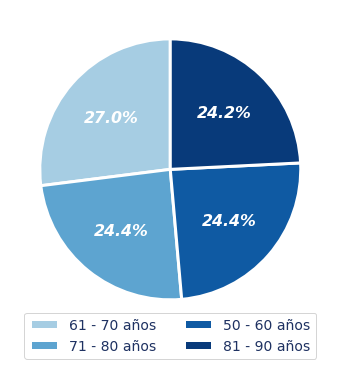

In [8]:
visual_pie_chart_by_ageGroup(df['edad_arg'].value_counts(),df['años_rango'].unique())

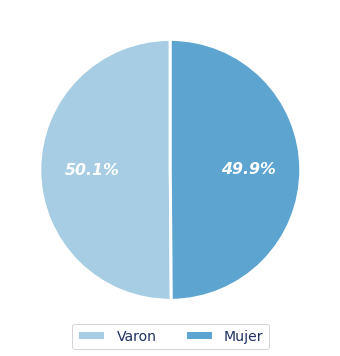

In [9]:
visual_pie_chart_by_ageGroup(df['sexo_usuario'].value_counts(),df['sexo_usuario'].unique())

### Funtion Bar chart Grupo de edad VOTOS

In [35]:
def edad_by_valorizacion(grupo_edad,value):
    return df[df['edad_arg'] == grupo_edad][value].count()

def bar_chart_total_votes_per_age_group(title,campo_a_valorar):
    data_edad_1 = []
    data_edad_2 = []
    data_edad_3 = []
    i = 0
    for _ in df['edad_arg'].unique():
        
        data_edad_1.append(edad_by_valorizacion(_,campo_a_valorar + str(i + 1)))
        data_edad_2.append(edad_by_valorizacion(_,campo_a_valorar + str(i + 2)))
        data_edad_3.append(edad_by_valorizacion(_,campo_a_valorar + str(i + 3)))
        
        
        
    x_bar = df['edad_arg'].unique()
    
     
    font = {'family' : 'Lato',
        'weight' : 'bold',
        'size'   : 22}
    
    x_label = df['edad_arg'].unique()
    x_axis = np.arange(len(x_label))
    
    fot_label = {'family' : 'Lato','size'   : 12 }

    fig,ax = plt.subplots(figsize = (8,6))
    ax.bar(x_axis,data_edad_1,0.2,color = '#5DA4D0',label= campo_a_valorar.replace('_',' ') + '1')
    ax.bar(x_axis - 0.21 ,data_edad_2,0.2,color = '#4A4D9B',label= campo_a_valorar.replace('_',' ') + '2')
    ax.bar(x_axis + 0.21 ,data_edad_3,0.2,color = '#49BCC4',label= campo_a_valorar.replace('_',' ') + '3')
    
    
 
    
    plt.xticks(x_axis,x_label)
    plt.xlabel("Grupo de Edades",font = fot_label)
    plt.ylabel("Numero de valoraciones",font = fot_label)
    plt.title(title,font = font,y = 1.1)
    plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')


    
    plt.show()

### Function pia char 3 axis (3 pie chart dibujadas a la ves de los votos)

In [24]:
def visualization_piechart_3_axis_votes(value_1,value_2,value_3,legen_labels):
    fig, ax =  plt.subplots(1,3,figsize = (16,6))

    plt.rcParams['font.size']=11
    plt.rcParams['text.color'] = '#1F3262'
    text_prop = {'family':'DejaVu Sans', 'fontsize':'x-large', 
                 'fontstyle':'italic', 'fontweight':'heavy'}

    color = '#A6CDE3','#5DA4D0','#0F5AA3','#083A7A'
    patches, texts, pcts = ax[0].pie(value_1,
            startangle=90, colors = color, 
            autopct='%.1f%%',
            wedgeprops={'linewidth': 2.0, 'edgecolor': '#4A4D9B'},
            textprops=text_prop,shadow=False,
            explode=[0.04,0,0])
    plt.setp(pcts, color='white', fontweight='bold')


    patches, texts, pcts =ax[1].pie(value_2,
            startangle=90, colors = color, 
            autopct='%.1f%%',
            wedgeprops={'linewidth': 2.0, 'edgecolor': '#4A4D9B'},
            textprops=text_prop,shadow=False,
            explode=[0.04,0,0])
    plt.setp(pcts, color='white', fontweight='bold')

    patches, texts, pcts =ax[2].pie(value_3,
            startangle=90, colors = color, 
            autopct='%.1f%%',
            wedgeprops={'linewidth': 2.0, 'edgecolor': '#4A4D9B'},
            textprops=text_prop,shadow=False,
            explode=[0.04,0,0])
    plt.setp(pcts, color='white', fontweight='bold')

    plt.legend(labels = legen_labels,
               loc='upper left', 
               bbox_to_anchor=(-2.4,1.15), fontsize=14,ncol = 2)

    
    plt.show()

# Valoracines Visuales - Bar char,Pie char

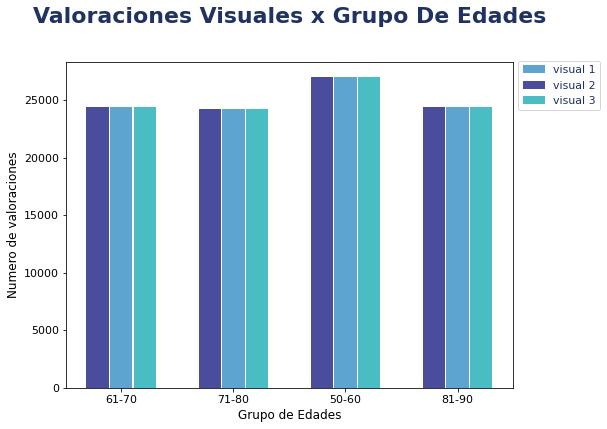

In [36]:
bar_chart_total_votes_per_age_group("Valoraciones Visuales x Grupo De Edades","visual_")


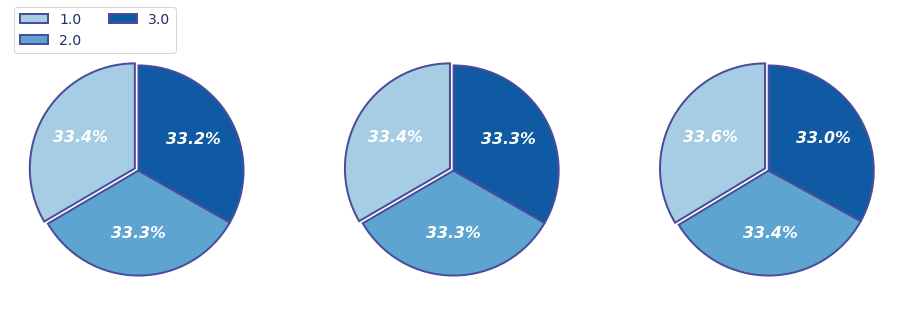

In [25]:
visualization_piechart_3_axis_votes(df['visual_1'].value_counts(),
                              df['visual_2'].value_counts(),
                              df['visual_3'].value_counts(),
                              df['visual_1'].unique())

# Valoracines Auditivas- Bar char,Pie char

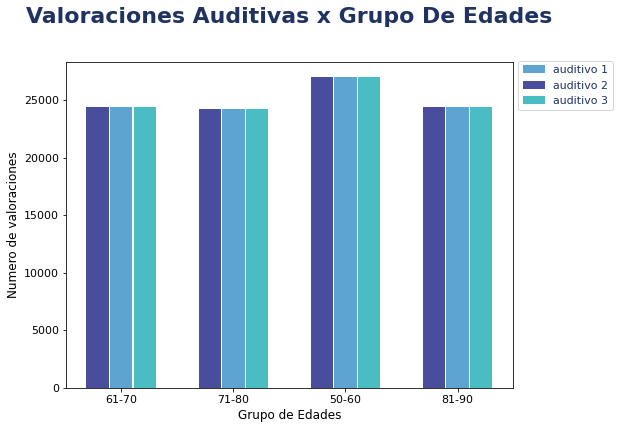

In [37]:
bar_chart_total_votes_per_age_group("Valoraciones Auditivas x Grupo De Edades","auditivo_")


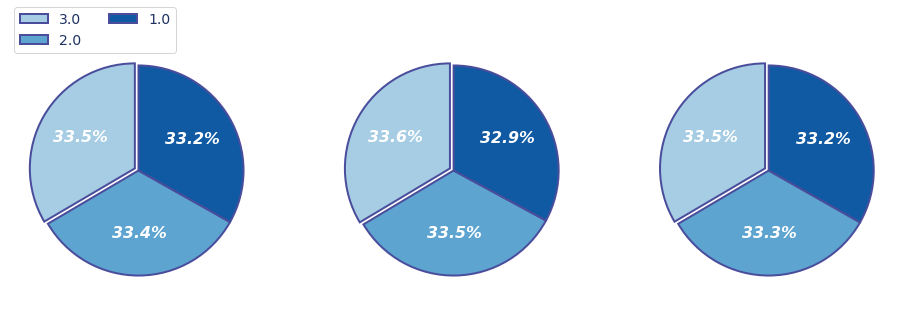

In [38]:
visualization_piechart_3_axis_votes(df['auditivo_1'].value_counts(),
                              df['auditivo_2'].value_counts(),
                              df['auditivo_3'].value_counts(),
                              df['auditivo_1'].unique())

# Valoracines FISICAS - Bar char,Pie char

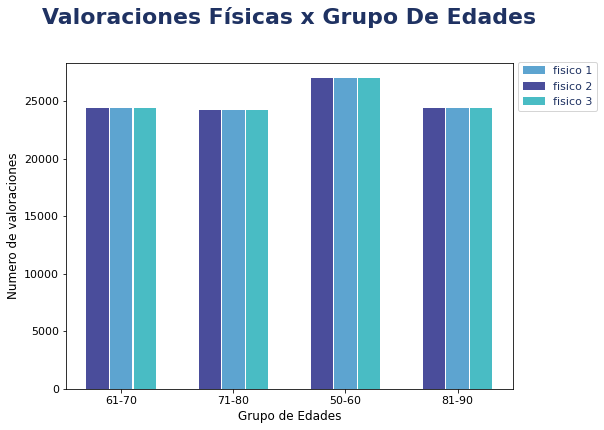

In [40]:
bar_chart_total_votes_per_age_group("Valoraciones Físicas x Grupo De Edades","fisico_")


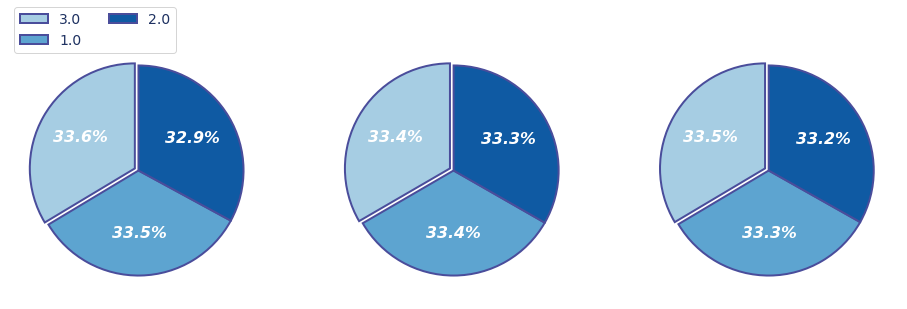

In [41]:
visualization_piechart_3_axis_votes(df['fisico_1'].value_counts(),
                              df['fisico_2'].value_counts(),
                              df['fisico_3'].value_counts(),
                              df['fisico_1'].unique())

# Valoracines Cognitivas - Bar char,Pie char

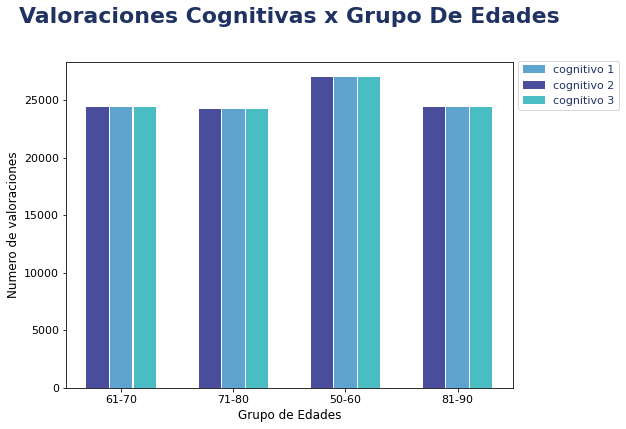

In [43]:
bar_chart_total_votes_per_age_group("Valoraciones Cognitivas x Grupo De Edades","cognitivo_")


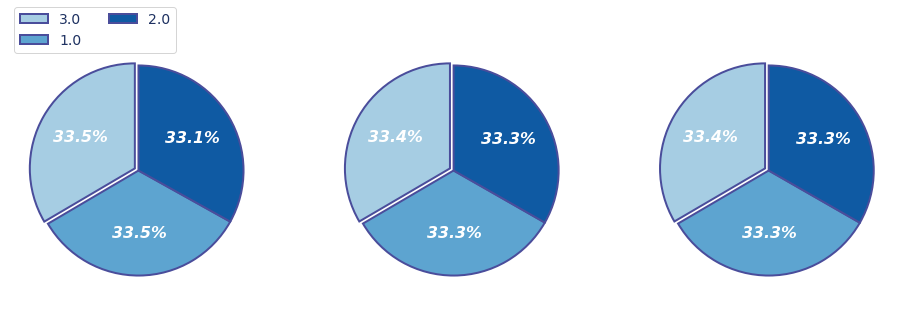

In [44]:
visualization_piechart_3_axis_votes(df['cognitivo_1'].value_counts(),
                              df['cognitivo_2'].value_counts(),
                              df['cognitivo_3'].value_counts(),
                              df['cognitivo_1'].unique())

# Valoracines Técnias - Bar char,Pie char

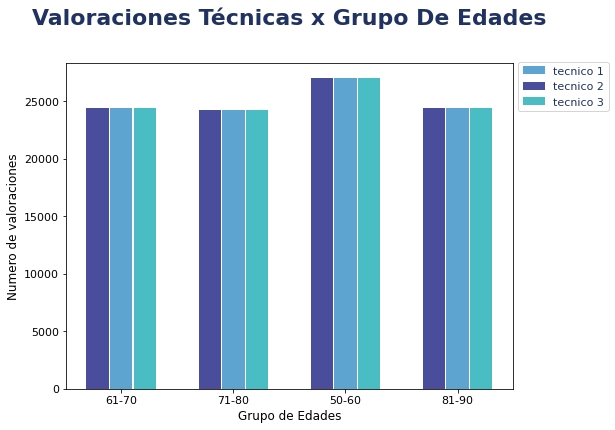

In [46]:
bar_chart_total_votes_per_age_group("Valoraciones Técnicas x Grupo De Edades","tecnico_")


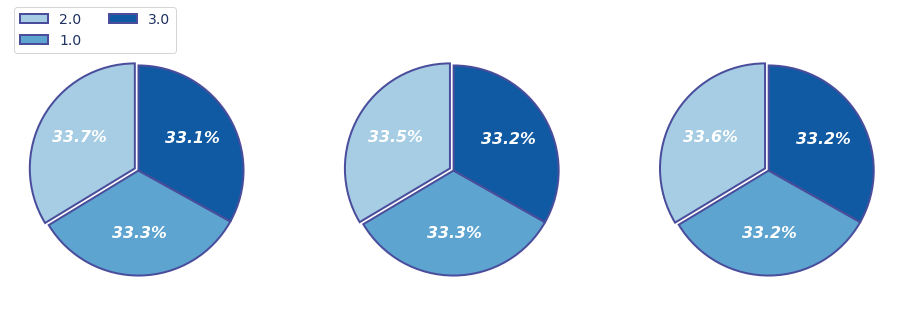

In [47]:
visualization_piechart_3_axis_votes(df['tecnico_1'].value_counts(),
                              df['tecnico_2'].value_counts(),
                              df['tecnico_3'].value_counts(),
                              df['tecnico_1'].unique())

# -> FIN DEL EDA VISUALIZACIONES DE LOS CAMPOS REQUERIDOS PARA EL PDF <-

# inicio de proposition gráficas 

en este apartado son gráficos de propuestas que puedes utilizarlos apra remplezar los del eda o simplement verlo por si te interesa alguno.
En este aparte podrás encontar el pie chart e solitario de las votaciones

## Function  de grafica pie chart son sub grafica pie chart de sexo
ESTA FUNCOION NO LA VAS A USAR POR QUE SE COMPRENDO

In [52]:
sex_user = []
for n in df.groupby('edad_arg')['sexo_usuario'].unique():
    sex_user.append(n)
sex_user = np.array(sex_user)
sex_user.flatten()
labels = ['M : Mujer', 'V : Varon', 'V : Varon', 'M : Mujer', 'V : Varon', 'M : Mujer', 'M : Mujer',
       'V : Varon']

sex_abre = []
for _ in sex_user.flatten():
    if _ == 'V':
        _ = 'H'
    sex_abre.append(_[0])
sex_abre

['M', 'V', 'V', 'M', 'V', 'M', 'M', 'V']

In [53]:
def visulaization_piechar_with_subgraph_sex(value_pie,sub_value_pie):
    fig, ax = plt.subplots(figsize = (6,6))

    size = 0.5
    
    plt.rcParams['font.size']= 8
    plt.rcParams['text.color'] = '#1F3262'
    text_prop = {'family':'DejaVu Sans', 'fontsize':'x-large', 
                 'fontstyle':'italic', 'fontweight':'heavy'}
    text_subprop = {'family':'DejaVu Sans', 'fontsize':11, 
                 'fontstyle':'italic', 'fontweight':'heavy','color' : 'white'}

    color = '#A6CDE3','#5DA4D0','#0F5AA3','#083A7A'
    ccolor = '#1F3262', '#4A4D9B', '#49BCC4' 
    color1 =  '#1F3262','#4A4D9B','#49BCC4'
    patches, texts, pcts = ax.pie(value_pie,
            labels = df['años_rango'].unique(),
            startangle=90, colors = color, 
            autopct='',
            pctdistance=0.75,
            wedgeprops={'width' : size,'linewidth': 3.0, 
                            'edgecolor': 'white'},
            textprops=text_prop,shadow=False)
    plt.setp(pcts, color='white', fontweight='bold')


    ax.pie(sub_value_pie,
           radius=1-size, colors=color1,startangle=90,
           labels = sex_abre,labeldistance=0.7,
           pctdistance=0.75,
           wedgeprops=dict(width=0.3, edgecolor='w'),textprops = text_subprop)

    plt.legend(sex_user.flatten(),
               loc="center", 
               bbox_to_anchor=(0.5,-0.04), fontsize=14,ncol = 3)
    plt.show();

### Cantidad de peronas que tiene los diferentes grupos de edades agregando el sub grafica de sexo por grupo

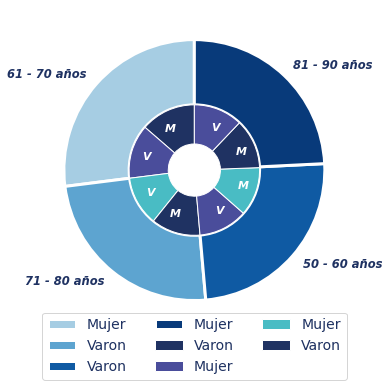

In [54]:
visulaization_piechar_with_subgraph_sex(df['edad_arg'].value_counts(),df.groupby('edad_arg')['sexo_usuario'].value_counts())

### Proposición de gráfica para Pablo, pie chart solitaria de votos.
te lo dejo en caso de que te pueda servir.
LA FUNCTION YA EXISTE DENTRO DEL EDA ASI QUE SOLO SERIA LLAMARLA COMO LO VES A CONTINUACION

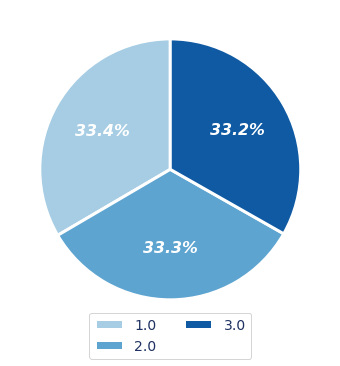

In [55]:
visual_pie_chart_by_ageGroup(df['visual_1'].value_counts(),df['visual_1'].unique())


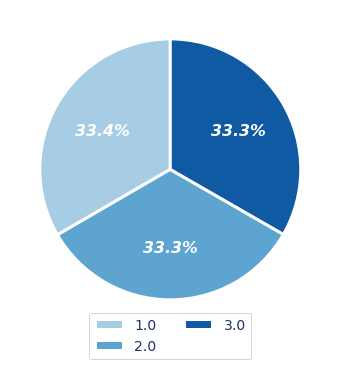

In [56]:
visual_pie_chart_by_ageGroup(df['visual_2'].value_counts(),df['visual_1'].unique())


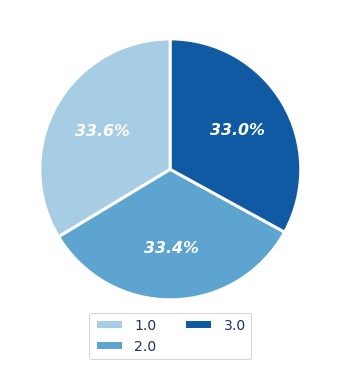

In [57]:
visual_pie_chart_by_ageGroup(df['visual_3'].value_counts(),df['visual_1'].unique())


# Function Bar char Valoraciones Totales
No se por que hice dos diferentes jajajajaja el cerebro dejo de funcionar.

## Ejemplo Grafíco pie chart de votos en las distintas valoraciones
PABLO ESTAS SON LAS GRAFICOS DE VALORACION EN SOLITARIO
ES DECIR USANDO ESTA FUNCIÓN TE SALE UNA SOLA IMAGEN DE VISUAL_1 Y ASI

# Visual Total

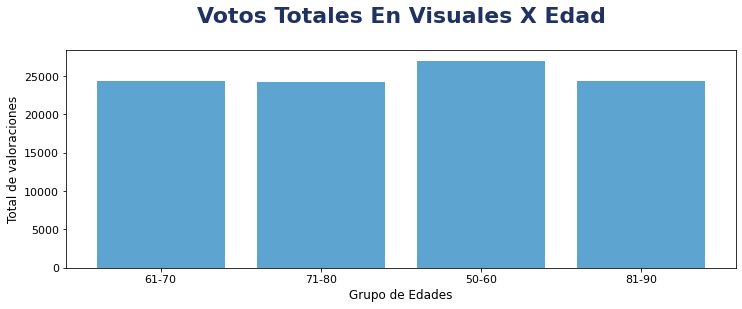

In [58]:
valoracion_total("votos totales en visuales x edad","visual_tot")

# Auditivo Total

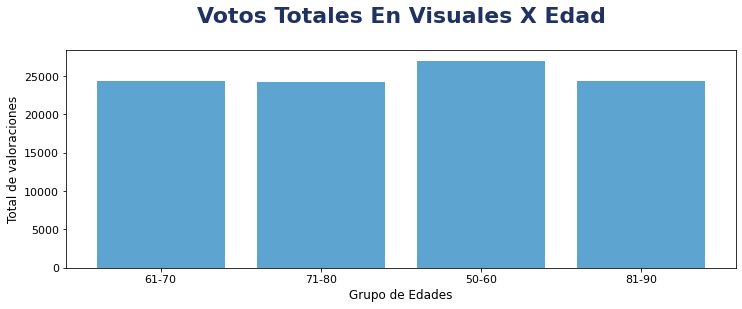

In [59]:
valoracion_total("votos totales en visuales x edad",'auditivo_tot')

# Fisico total

In [57]:
def edad_by_val_tot(grupo_edad,valoracion):
    return df[df['edad_arg'] == grupo_edad][valoracion].count()

x_bar = df['edad_arg'].unique()

def valoracion_total(title,val_total):
    valoracio_total_edad = []

    for _ in df['edad_arg'].unique():
        valoracio_total_edad.append(edad_by_val_tot(_,val_total))
    
    
    fig,ax = plt.subplots(figsize = (12,4))
    font = {'family' : 'Lato',
        'weight' : 'bold',
        'size'   : 22}
    
    
    
    fot_label = {'family' : 'Lato','size'   : 12 }

    
    ax.bar(x_bar,valoracio_total_edad,color = '#5DA4D0')
    
    plt.xticks(df['edad_arg'].unique())
    plt.xlabel("Grupo de Edades",font = fot_label)
    plt.ylabel("Total de valoraciones",font = fot_label)
    plt.title(title.title(),font = font,y = 1.1)

    plt.show()

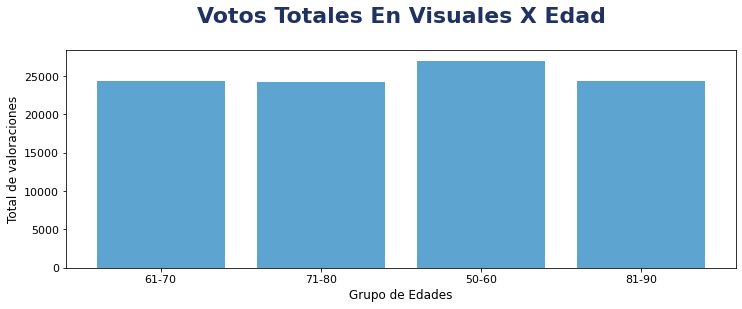

In [60]:
valoracion_total("votos totales en visuales x edad",'fisico_tot')

# Cognitivo Total

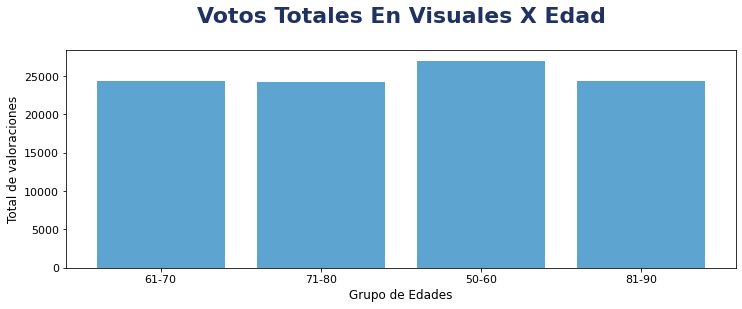

In [61]:
valoracion_total("votos totales en visuales x edad",'cognitivo_tot')

# Tecnico total

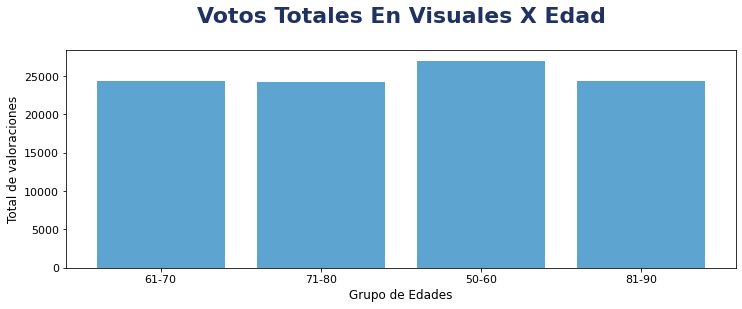

In [62]:
valoracion_total("votos totales en visuales x edad",'tecnico_tot')

# Proposition para pablo gráfica pie char votos

In [66]:
# Legend Label para sub Pie chart
sex_user_vote = []
for n in df.groupby('visual_1')['sexo_usuario'].unique():
    sex_user_vote.append(n)

sex_user_vote = np.array(sex_user_vote)
sex_user_vote.flatten()

def visulaization_piechar_by_sex(value_pie,sub_value_pie):
    fig, ax = plt.subplots(figsize = (6,6))

    size = 0.5

    plt.rcParams['font.size']= 8
    plt.rcParams['text.color'] = '#1F3262'
    text_prop = {'family':'DejaVu Sans', 'fontsize':'x-large', 
                 'fontstyle':'italic', 'fontweight':'heavy'}
    text_subprop = {'family':'DejaVu Sans', 'fontsize':11, 
                 'fontstyle':'italic', 'fontweight':'heavy','color' : 'white'}

    color = '#A6CDE3','#5DA4D0','#0F5AA3','#083A7A'
    ccolor = '#1F3262', '#4A4D9B', '#49BCC4' 
    color1 =  '#1F3262','#4A4D9B','#49BCC4'
    patches, texts, pcts = ax.pie(value_pie,
            labels =df['visual_1'].unique(),
            startangle=90, colors = color, 
            autopct='',
            pctdistance=0.75,
            wedgeprops={'width' : size,'linewidth': 3.0, 
                            'edgecolor': 'white'},
            textprops=text_prop,shadow=False)
    plt.setp(pcts, color='white', fontweight='bold')


    ax.pie(sub_value_pie,
           #labels = sex_abre,labeldistance=0.7,
           radius=1-size, colors=color1,startangle=90,
           autopct='%.1f%%',
           pctdistance=0.75,
           wedgeprops=dict(width=0.3, edgecolor='w'),textprops = text_subprop)

    plt.legend(sex_user_vote.flatten(),
               loc="center", 
               bbox_to_anchor=(0.5,-0.04), fontsize=14,ncol = 3)
    # ax.set(aspect="equal", title='Pie plot with `ax.pie`')
    plt.show();

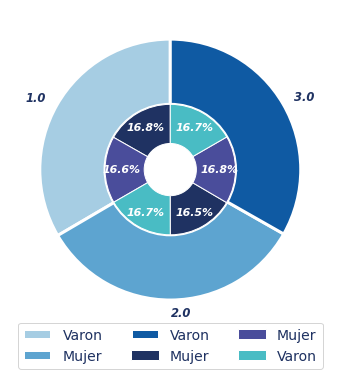

In [67]:
visulaization_piechar_by_sex(df['visual_1'].value_counts(),
                             df.groupby('visual_1')['sexo_usuario'].value_counts())

In [68]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split()